# Experimento 7 : Test te results

## Load the CBNs and show his topologies

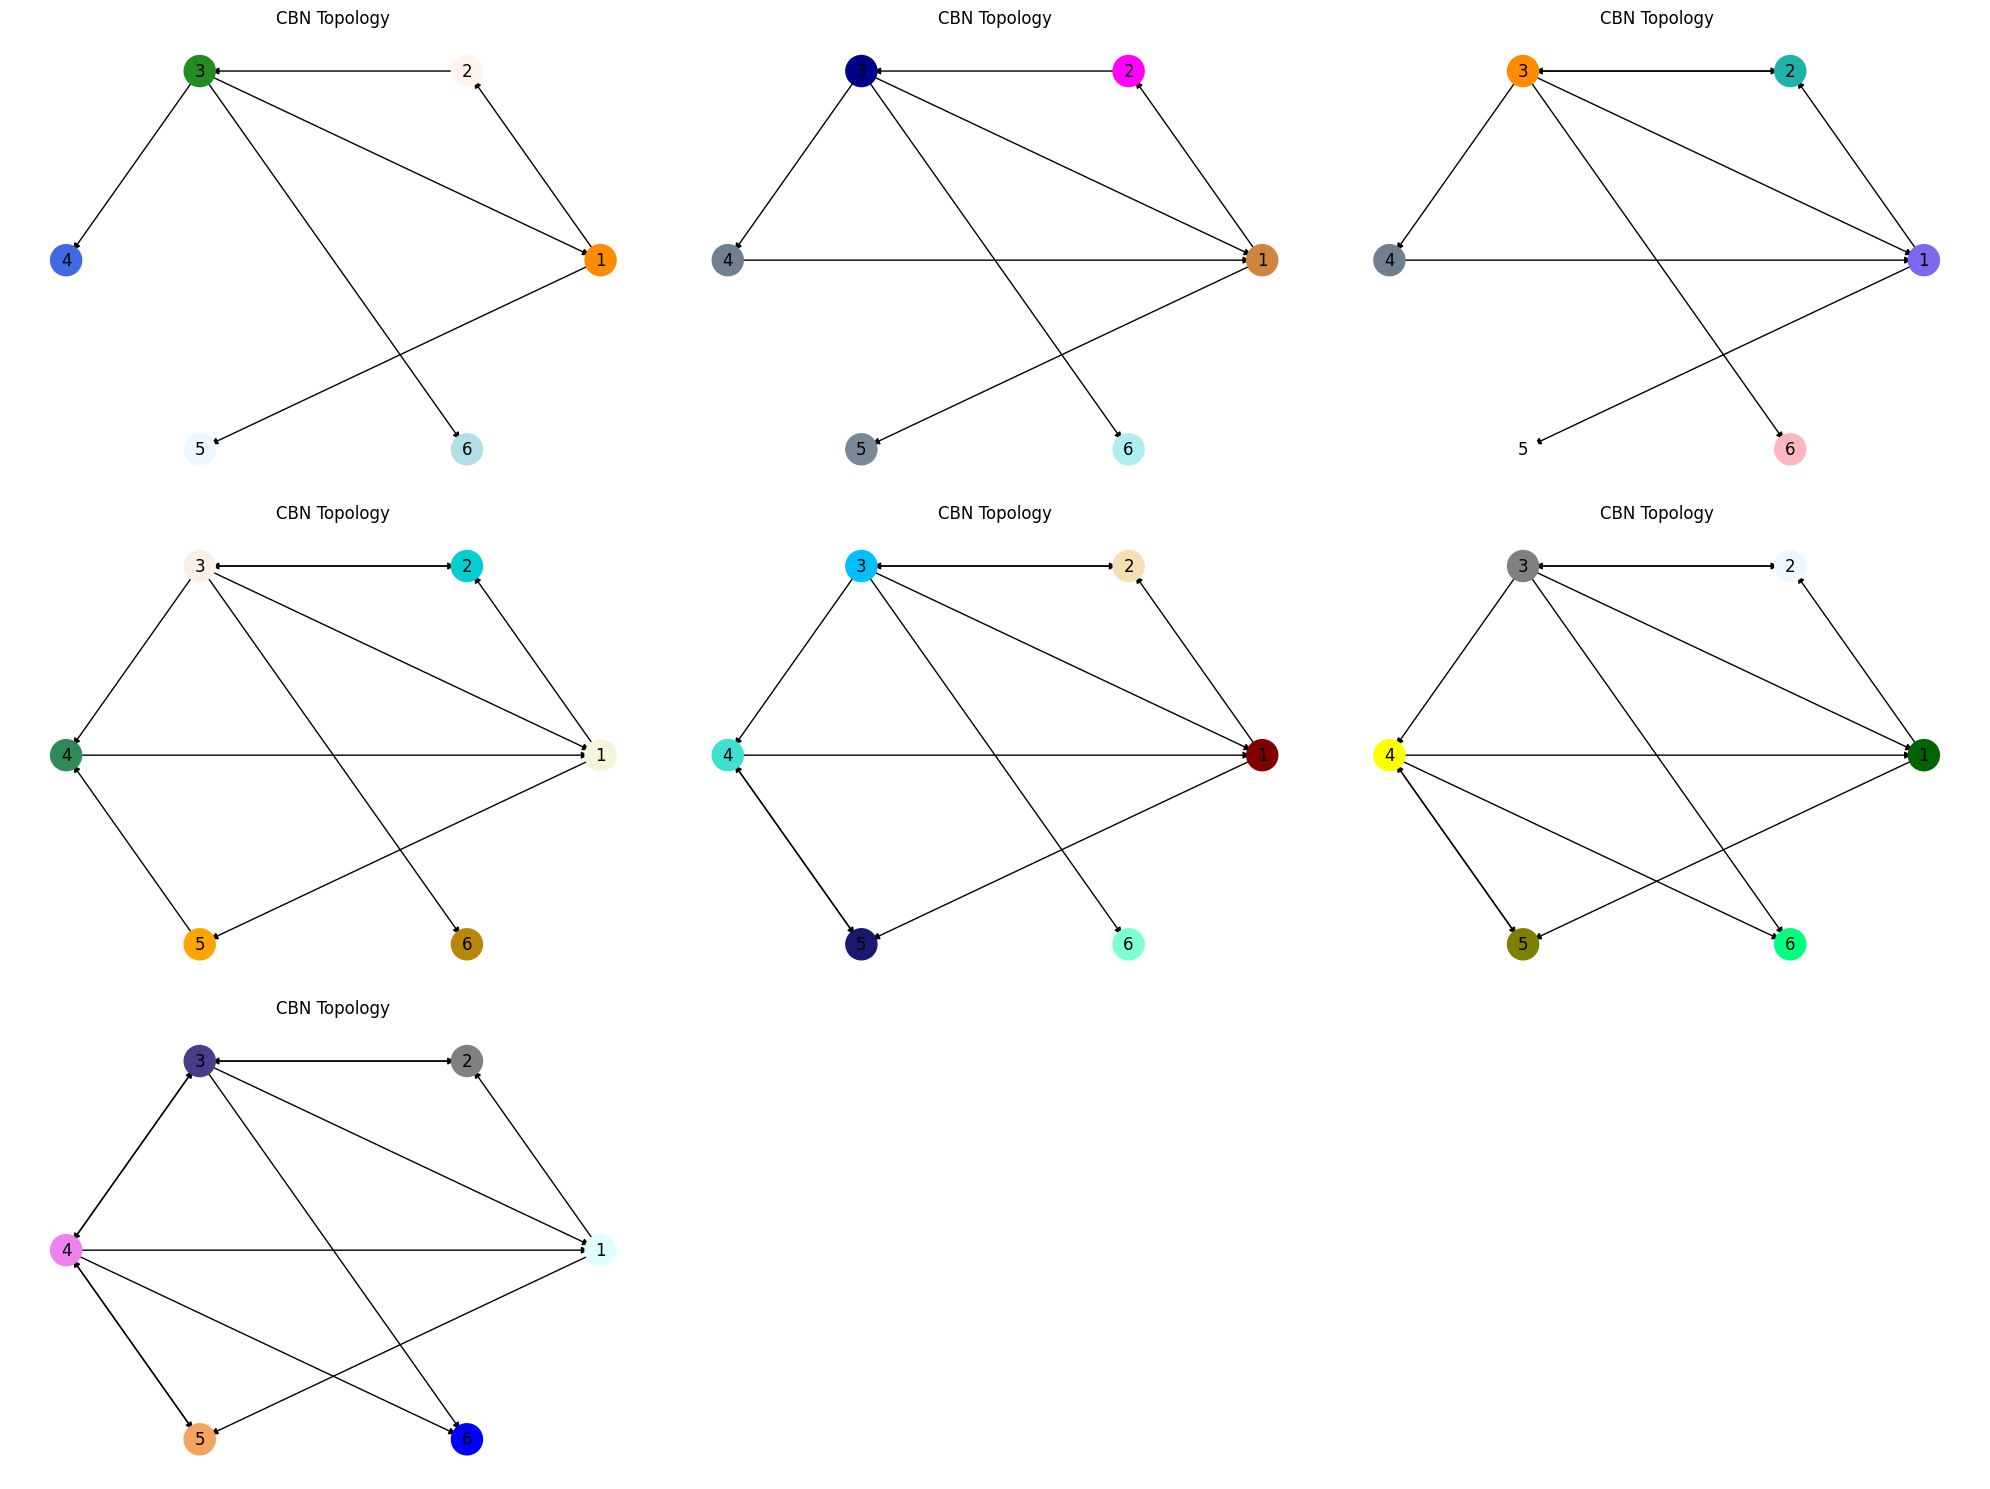

In [12]:
import pickle
import os
import matplotlib.pyplot as plt

# Define el segundo número en la ruta del archivo pickle
second_number = 6  # Cambia esto según sea necesario

# Ruta base sin el número cambiante
base_path_cbn = f'outputs/exp7_data_3_6_5/pkl_cbn/cbn_5_{second_number}_'

# Número inicial y rango máximo
start_number = second_number
max_number = 2 * start_number

# Lista de archivos pickle existentes
pickle_files = [f"{base_path_cbn}{i}.pkl" for i in range(start_number, max_number + 1) if os.path.exists(f"{base_path_cbn}{i}.pkl")]

# Número total de gráficos
total_graphs = len(pickle_files)

# Configuración de subplots en múltiples filas y columnas
cols = 3
rows = (total_graphs + cols - 1) // cols  # Calcula el número de filas necesario

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

# Aplanar la matriz de ejes si hay más de una fila
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterador para cargar y mostrar las topologías
for path_cbn, ax in zip(pickle_files, axes):
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Mostrar la información de CBN en el subplot correspondiente
    o_cbn.plot_topology(ax=ax)  # Asegúrate de que plot_topology acepte un parámetro ax

# Eliminar ejes vacíos si hay menos gráficos que espacios de subplots
for ax in axes[total_graphs:]:
    fig.delaxes(ax)

# Ajustar el layout y mostrar todas las gráficas juntas
plt.tight_layout()
plt.show()
